# 딥 러닝을 이용한 자연어 처리 입문

아래 링크의 E-book을 보고 실습한 내용입니다.

WikiDocs 주소: https://wikidocs.net/31766

# 8장 딥 러닝 개요

## 10절 다층 퍼셉트론으로 텍스트 분류하기

### Keras의 text_to_matrix 함수 이해하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


In [2]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)


{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [3]:
textsToMatrixModes = ["count", "binary", "tfidf", "freq"]
for mode in textsToMatrixModes:
    print(f"Keras texts_to_matrix 결과 (mode: {mode})")
    print(tokenizer.texts_to_matrix(texts, mode=mode))
    print()


Keras texts_to_matrix 결과 (mode: count)
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

Keras texts_to_matrix 결과 (mode: binary)
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]

Keras texts_to_matrix 결과 (mode: tfidf)
[[0.         0.         0.84729786 0.84729786 1.09861229 0.
  0.         0.         0.         0.        ]
 [0.         0.84729786 0.84729786 0.84729786 0.         0.
  0.         0.         0.         0.        ]
 [0.         1.43459998 0.         0.         0.         1.09861229
  1.09861229 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.09861229 1.09861229 1.09861229]]

Keras texts_to_matrix 결과 (mode: freq)
[[0.         0.         0.33333333 0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.         0.33333333 0.33333

### 20 뉴스 그룹 데이터 이해

In [4]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical


In [5]:
# train = 훈련용, test = 평가용, all = 전체 18,846개의 샘플
newsdata = fetch_20newsgroups(subset='train')
print("데이터의 헤더:", newsdata.keys())
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)


데이터의 헤더: dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
print(f"0번 샘플의 주제: {newsdata.target_names[7]}")
print("0번 샘플 내용\n")
print(newsdata.data[0])


0번 샘플의 주제: rec.autos
0번 샘플 내용

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
# DataFrame 생성
data = pd.DataFrame(newsdata.data, columns=['email'])
data['target'] = pd.Series(newsdata.target)
data.head()


,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [9]:
print("Null value 확인: ", data.isnull().values.any())
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))


Null value 확인:  False
중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


<AxesSubplot:>

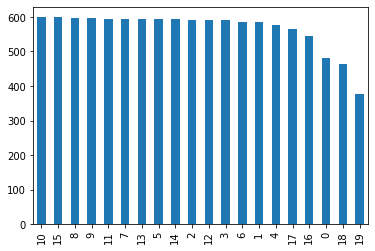

In [10]:
# 레이블 값 분포 시각화
data['target'].value_counts().plot(kind='bar')


In [11]:
# 레이블 값 분포 구체적인 수치 확인
print(data.groupby('target').size().reset_index(name='count'))


    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [12]:
# Test 데이터셋 불러오기
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
test_email = newsdata_test.data
test_label = newsdata_test.target

# 훈련 데이터셋에서 email과 레이블 분리
train_email = data['email']
train_label = data['target']


In [13]:
# 데이터 전처리 과정
max_words = 10000   # 사용할 단어의 개수 (상위 N개)
num_classes = 20    # 토픽의 개수


def prepare_data(train_data, test_data, mode):
    """전처리 함수 - 정수 인코딩 -> Matrix 생성"""
    tokenizer = Tokenizer(num_words=max_words)  # max_words 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode)
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode)
    return X_train, X_test, tokenizer.index_word


# 전처리
X_train, X_test, index_to_word = prepare_data(
    train_email, test_email, 'binary')

# one-hot 인코딩
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)

print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))


훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [14]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))


빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


### MLP를 사용하여 텍스트 분류하기

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model():
    """Sequential 모델을 만드는 함수
    입력층, 2개의 은닉층, 출력층 총 4개의 층으로 구성된 네트워크 입니다.
    은닉층의 개수가 2개 이상인 Deep neural network입니다.
    """
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    """모델을 학습하고 평가하는 함수
    입력받은 데이터셋에 따라 평가를 진행합니다.
    """
    model = create_model()
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128,
              epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [16]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


2021-11-22 04:10:11.358347: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2021-11-22 04:10:11.358421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (91f72fdd3418): /proc/driver/nvidia/version does not exist


In [17]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
Total params: 2,595,732
Trainable params: 2,595,732
Non-trainable params: 0
_________________________________________________________________


2021-11-22 04:10:11.406983: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# count, binary, tfidf, freq 4가지 모드로 다르게 전처리를 해서 모델에 입력으로 넣어본다.
for mode in textsToMatrixModes:
    X_train, X_test, _ = prepare_data(train_email, test_email, mode)
    score = fit_and_evaluate(X_train, y_train, X_test, y_test)
    print(mode+' 모드의 테스트 정확도:', score)


2021-11-22 04:10:20.358377: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 407280000 exceeds 10% of free system memory.


Epoch 1/5
80/80 [==============================] - 3s 25ms/step - loss: 2.7176 - accuracy: 0.2471 - val_loss: 1.5517 - val_accuracy: 0.7359
Epoch 2/5
80/80 [==============================] - 1s 18ms/step - loss: 1.4058 - accuracy: 0.6346 - val_loss: 0.6807 - val_accuracy: 0.8507
Epoch 3/5
80/80 [==============================] - 2s 22ms/step - loss: 0.7523 - accuracy: 0.8064 - val_loss: 0.5132 - val_accuracy: 0.8763
Epoch 4/5
80/80 [==============================] - 2s 20ms/step - loss: 0.5152 - accuracy: 0.8814 - val_loss: 0.4367 - val_accuracy: 0.8843
Epoch 5/5
80/80 [==============================] - 1s 17ms/step - loss: 0.3878 - accuracy: 0.9135 - val_loss: 0.4085 - val_accuracy: 0.8913


2021-11-22 04:10:29.344131: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301280000 exceeds 10% of free system memory.


count 모드의 테스트 정확도: 0.8223579525947571


2021-11-22 04:10:39.076922: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 407280000 exceeds 10% of free system memory.


Epoch 1/5
80/80 [==============================] - 2s 19ms/step - loss: 2.2857 - accuracy: 0.3384 - val_loss: 0.9833 - val_accuracy: 0.8039
Epoch 2/5
80/80 [==============================] - 2s 19ms/step - loss: 0.8766 - accuracy: 0.7565 - val_loss: 0.4495 - val_accuracy: 0.8905
Epoch 3/5
80/80 [==============================] - 2s 19ms/step - loss: 0.4401 - accuracy: 0.8841 - val_loss: 0.3532 - val_accuracy: 0.8958
Epoch 4/5
80/80 [==============================] - 1s 18ms/step - loss: 0.2645 - accuracy: 0.9322 - val_loss: 0.3032 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 1s 18ms/step - loss: 0.1677 - accuracy: 0.9590 - val_loss: 0.2908 - val_accuracy: 0.9108


2021-11-22 04:10:47.354720: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301280000 exceeds 10% of free system memory.


binary 모드의 테스트 정확도: 0.8276686072349548


2021-11-22 04:11:03.188445: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 407280000 exceeds 10% of free system memory.


Epoch 1/5
80/80 [==============================] - 2s 25ms/step - loss: 2.1612 - accuracy: 0.3764 - val_loss: 0.7325 - val_accuracy: 0.8454
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 0.7927 - accuracy: 0.7877 - val_loss: 0.4194 - val_accuracy: 0.8940
Epoch 3/5
80/80 [==============================] - 2s 22ms/step - loss: 0.4364 - accuracy: 0.8885 - val_loss: 0.3391 - val_accuracy: 0.9081
Epoch 4/5
80/80 [==============================] - 1s 18ms/step - loss: 0.2846 - accuracy: 0.9300 - val_loss: 0.3241 - val_accuracy: 0.9081
Epoch 5/5
80/80 [==============================] - 1s 19ms/step - loss: 0.2147 - accuracy: 0.9518 - val_loss: 0.3184 - val_accuracy: 0.9117
tfidf 모드의 테스트 정확도: 0.828066885471344
Epoch 1/5
80/80 [==============================] - 2s 21ms/step - loss: 2.9764 - accuracy: 0.0799 - val_loss: 2.9245 - val_accuracy: 0.2085
Epoch 2/5
80/80 [==============================] - 2s 19ms/step - loss: 2.7181 - accuracy: 0.2122 - val_loss: 2.3961 - val_